## Import Libraries

In [3]:
import pandas
import random
import numpy
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt

## Split the Dataset

In [4]:
data_path = r"input"

dataset = pandas.read_csv(data_path + '/english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pandas.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 5)
test_set = pandas.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)

print(test_set)

                image label
0  Img/img026-028.png     P
1  Img/img045-051.png     i
2  Img/img020-045.png     J
3  Img/img039-046.png     c
4  Img/img011-024.png     A


## Data Preprocessing

In [5]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label', 
target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 5 classes.


## Building the CNN Model

In [6]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

In [11]:


# add full connection
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
# output layer
cnn.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

Epoch 1/30
91/91 [==============================] - 23s 248ms/step - loss: 3.8406 - accuracy: 0.0784 - val_loss: 2.9708 - val_accuracy: 0.2384
Epoch 2/30
91/91 [==============================] - 20s 222ms/step - loss: 2.1615 - accuracy: 0.4351 - val_loss: 1.6651 - val_accuracy: 0.5515
Epoch 3/30
91/91 [==============================] - 20s 224ms/step - loss: 1.2839 - accuracy: 0.6375 - val_loss: 1.3822 - val_accuracy: 0.6242
Epoch 4/30
91/91 [==============================] - 20s 224ms/step - loss: 0.9288 - accuracy: 0.7265 - val_loss: 1.2366 - val_accuracy: 0.6768
Epoch 5/30
91/91 [==============================] - 20s 219ms/step - loss: 0.7168 - accuracy: 0.7729 - val_loss: 1.0853 - val_accuracy: 0.7273
Epoch 6/30
91/91 [==============================] - 20s 216ms/step - loss: 0.5186 - accuracy: 0.8285 - val_loss: 1.2623 - val_accuracy: 0.6747
Epoch 7/30
91/91 [==============================] - 20s 219ms/step - loss: 0.3969 - accuracy: 0.8722 - val_loss: 1.1604 - val_accuracy: 0.7273

Epoch 1/30
91/91 [==============================] - 21s 221ms/step - loss: 0.0394 - accuracy: 0.9863 - val_loss: 1.9038 - val_accuracy: 0.7697
Epoch 2/30
91/91 [==============================] - 20s 219ms/step - loss: 0.0490 - accuracy: 0.9852 - val_loss: 1.8929 - val_accuracy: 0.7414
Epoch 3/30
91/91 [==============================] - 21s 227ms/step - loss: 0.0489 - accuracy: 0.9838 - val_loss: 2.1319 - val_accuracy: 0.7475
Epoch 4/30
91/91 [==============================] - 20s 218ms/step - loss: 0.0454 - accuracy: 0.9849 - val_loss: 1.9704 - val_accuracy: 0.7616
Epoch 5/30
91/91 [==============================] - 20s 215ms/step - loss: 0.0453 - accuracy: 0.9845 - val_loss: 1.9010 - val_accuracy: 0.7657
Epoch 6/30
91/91 [==============================] - 20s 222ms/step - loss: 0.0324 - accuracy: 0.9914 - val_loss: 1.8730 - val_accuracy: 0.7737
Epoch 7/30
91/91 [==============================] - 21s 233ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 2.0148 - val_accuracy: 0.7677

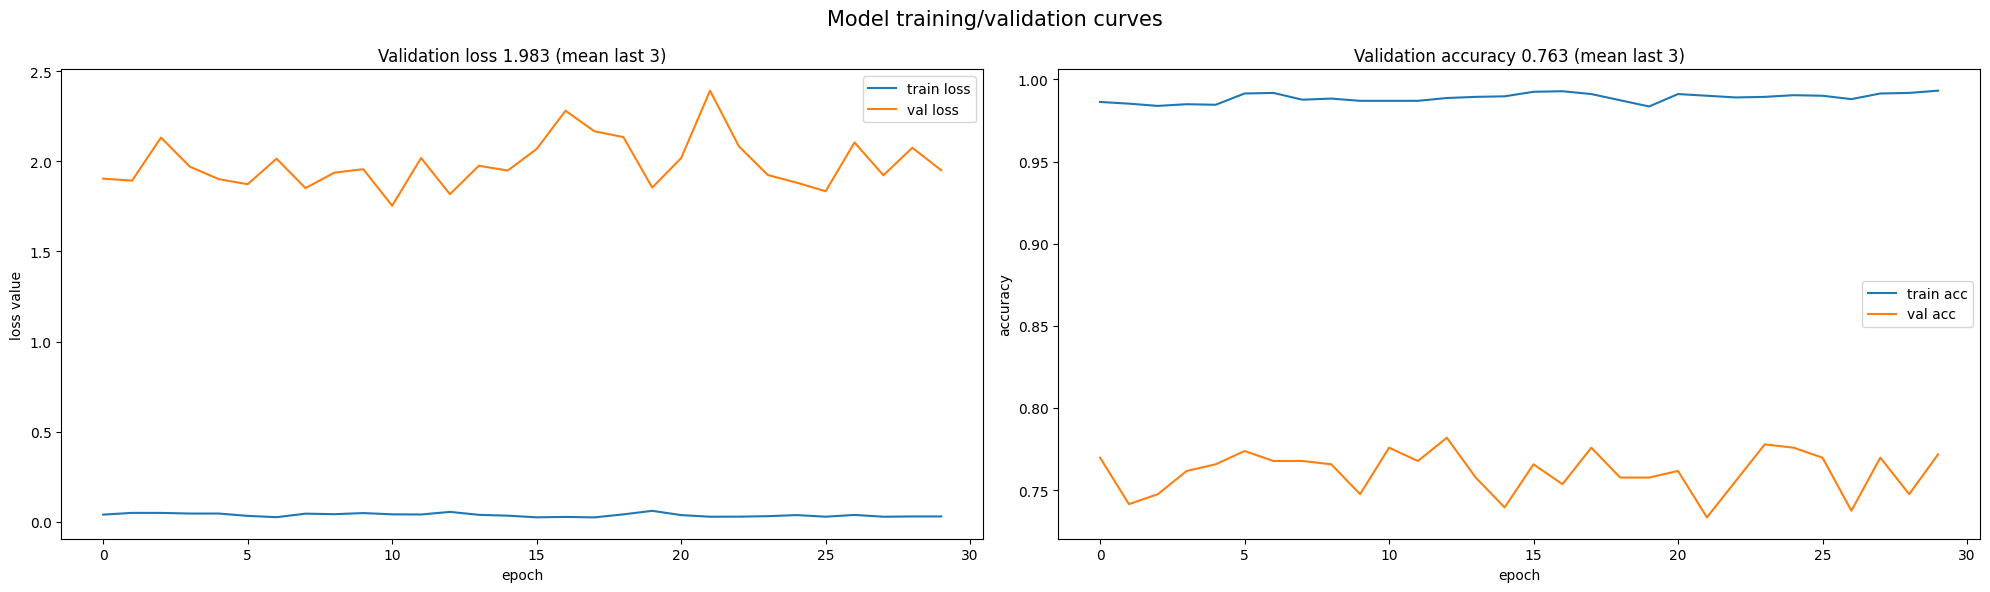

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Compile the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["accuracy"], label="train acc")
ax2.plot(history.history["val_accuracy"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_accuracy"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()

plt.tight_layout()
plt.show()

In [12]:
cnn.save('character.h5')
load_model = tf.keras.models.load_model('character.h5')

/home/fei-sofia/Project/Tugas-2-Kecerdasan-Artifisial-2108107010006/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Menampilkan jumlah total bobot
total_weights = sum([var.numpy().flatten().shape[0] for var in cnn.trainable_variables])

print("Jumlah Total Bobot pada Model:", total_weights)

Jumlah Total Bobot pada Model: 702962


## TensorBoard

In [14]:
from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
cnn.fit(x=training_data_frame, epochs=30, validation_data=validation_data_frame, callbacks=[tensorboard_callback])

Epoch 1/30
91/91 [==============================] - 21s 226ms/step - loss: 0.0576 - accuracy: 0.9790 - val_loss: 1.5563 - val_accuracy: 0.7636
Epoch 2/30
91/91 [==============================] - 20s 221ms/step - loss: 0.0764 - accuracy: 0.9787 - val_loss: 1.4710 - val_accuracy: 0.7596
Epoch 3/30
91/91 [==============================] - 22s 243ms/step - loss: 0.0698 - accuracy: 0.9804 - val_loss: 1.5627 - val_accuracy: 0.7596
Epoch 4/30
91/91 [==============================] - 21s 228ms/step - loss: 0.0638 - accuracy: 0.9828 - val_loss: 1.5846 - val_accuracy: 0.7657
Epoch 5/30
91/91 [==============================] - 20s 218ms/step - loss: 0.0632 - accuracy: 0.9814 - val_loss: 1.6522 - val_accuracy: 0.7596
Epoch 6/30
91/91 [==============================] - 20s 215ms/step - loss: 0.0629 - accuracy: 0.9780 - val_loss: 1.4897 - val_accuracy: 0.7778
Epoch 7/30
91/91 [==============================] - 20s 217ms/step - loss: 0.0531 - accuracy: 0.9818 - val_loss: 1.8282 - val_accuracy: 0.7475

## Predicting the TestSet Images

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
1/1 [==============================] - 0s 106ms/step
Max index:  [25, 44, 3, 38, 10]


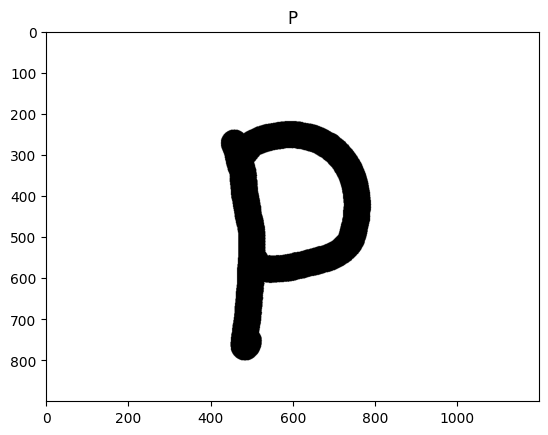

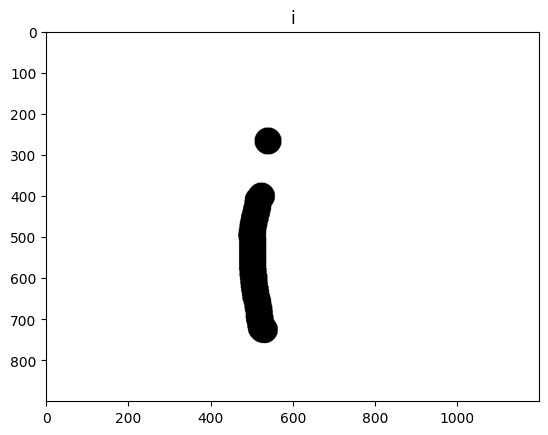

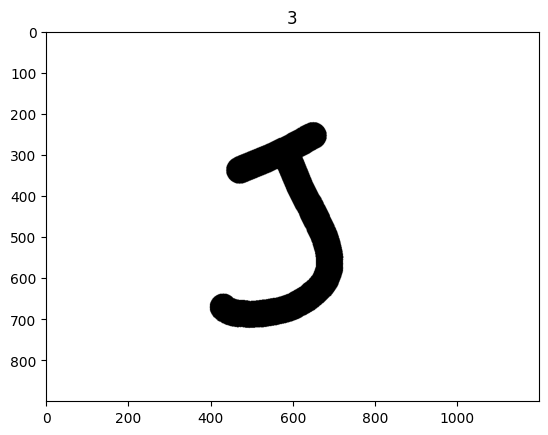

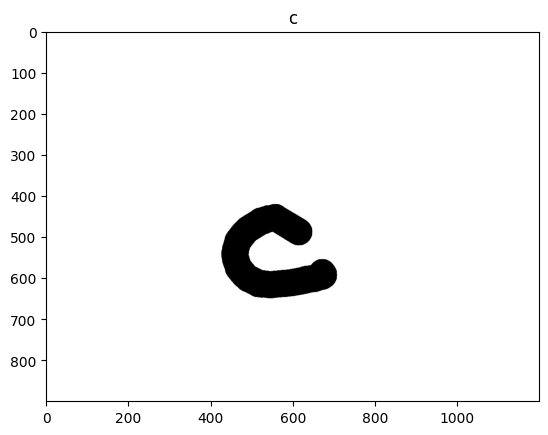

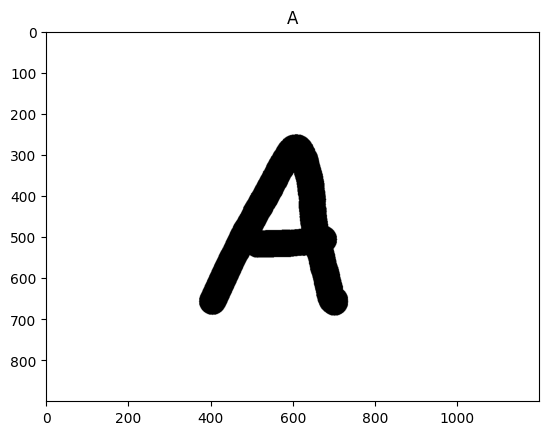

In [15]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pandas.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(data_path + '/' + test_set.at[i, 'image'])
    plt.title(switcher.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

## Accuration

In [20]:
test_loss_1, test_acc_1 = cnn.evaluate(validation_data_frame)

print('Validation loss:', test_loss_1)
print('Validation accuracy:', test_acc_1)

16/16 [==============================] - 3s 159ms/step - loss: 1.9502 - accuracy: 0.7717
Validation loss: 1.9502172470092773
Validation accuracy: 0.7717171907424927


In [22]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 164519), started 0:00:24 ago. (Use '!kill 164519' to kill it.)